# Homework 4 -- KMeans Lab

## Exercise 1

Create a function for loading and previewing data.

In [2]:
import numpy as np

def load_preview(filename):
    data = np.loadtxt(filename)
    print(f'Loaded array shape: {data.shape}')
    print()

    print('First five rows of data')
    print(data[:5])
    print()

    return data

Load and preview data.

In [3]:
ex1_data = load_preview('hw_data.txt')

Loaded array shape: (25000, 3)

First five rows of data
[[  1.       65.78331 112.9925 ]
 [  2.       71.51521 136.4873 ]
 [  3.       69.39874 153.0269 ]
 [  4.       68.2166  142.3354 ]
 [  5.       67.78781 144.2971 ]]



Get the first 350 rows and last two columns of data. Note that height in inches is column 1, and weight in lbs is column 2.

In [4]:
height_in = ex1_data[:350, 1]
weight_lbs = ex1_data[:350, 2]

Define a function to print summary statistics.

In [5]:
def print_summary(title, x):
    print(title)
    print(f'Min = {np.min(x):.02f}, Max = {np.max(x):.02f}')
    print(f'Mean = {np.mean(x):.02f}, Var = {np.var(x)}, Std = {np.std(x)}')
    print()

Print summary.

In [6]:
print_summary('Height (in)', height_in)
print_summary('Weight (lbs)', weight_lbs)

Height (in)
Min = 63.19, Max = 73.90
Mean = 67.95, Var = 3.6033967936014766, Std = 1.8982615187590661

Weight (lbs)
Min = 84.36, Max = 158.96
Mean = 126.85, Var = 145.00038262018663, Std = 12.041610466220314



Create function to standardize data.

In [7]:
def standardize(x):
    return (x - np.mean(x, axis=0, keepdims=True)) / np.std(x, axis=0, keepdims=True)

Standardize weight and height.

In [8]:
height_std = standardize(height_in)
weight_std = standardize(weight_lbs)

Plot standardized weights and heights.

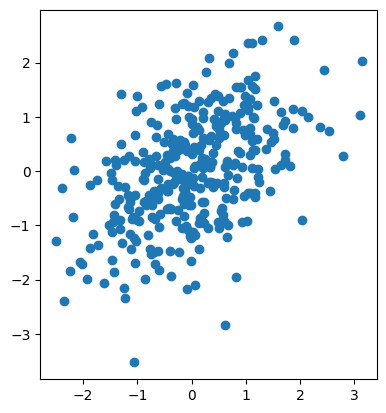

In [10]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
ax.scatter(height_std, weight_std)
ax.set_aspect(1.0)
plt.show()

Plot standardized weights and heights with red circles indicating 1, 2, and 3 standard deviations away from the mean. Save the result in `exercise1.jpg`.

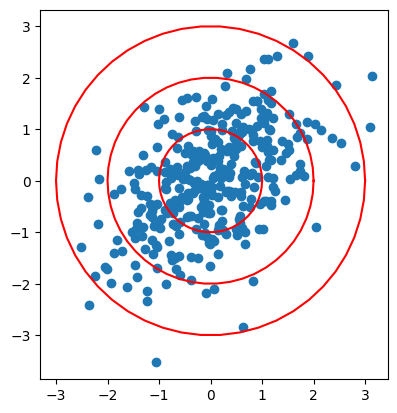

In [13]:
_, ax = plt.subplots()
ax.scatter(height_std, weight_std)

t = np.linspace(0, 2 * np.pi, 51)
x, y = np.cos(t), np.sin(t)

for r in (1, 2, 3):
    ax.plot(r * x, r * y, c='red')

ax.set_aspect(1.0)
plt.savefig('exercise1.jpg')
plt.show()

## Exercise 2

Load and preview data, print summary statistics, standardize, and plot standardized data. Note that eruption time is column 0, and wait time is column 1. 

Loaded array shape: (272, 2)

First five rows of data
[[ 3.6   79.   ]
 [ 1.8   54.   ]
 [ 3.333 74.   ]
 [ 2.283 62.   ]
 [ 4.533 85.   ]]

Eruption time (s)
Min = 1.60, Max = 5.10
Mean = 3.49, Var = 1.2979388904492861, Std = 1.139271210225768

Wait time (s)
Min = 43.00, Max = 96.00
Mean = 70.90, Var = 184.14381487889273, Std = 13.569960017586371



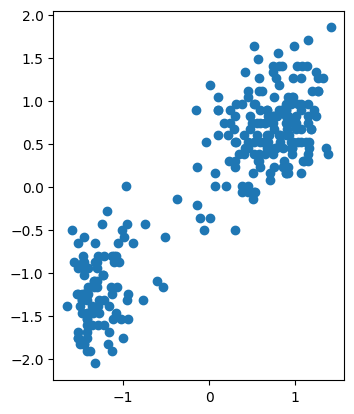

In [21]:
ex2_data = load_preview('faithful_data.txt')

eruption_time_s = ex2_data[:, 0]
wait_time_s = ex2_data[:, 1]

print_summary('Eruption time (s)', eruption_time_s)
print_summary('Wait time (s)', wait_time_s)

eruption_time_std = standardize(eruption_time_s)
wait_time_std = standardize(wait_time_s)

_, ax = plt.subplots()
ax.scatter(eruption_time_std, wait_time_std)
ax.set_aspect(1.0)
plt.show()

Perform KMeans with $k=1$ and $k=2$ and print energy.

In [19]:
from sklearn.cluster import KMeans

data2 = np.column_stack([eruption_time_std, wait_time_std])

kmeans = {}
for k in (1, 2):
    kmeans[k] = KMeans(k, n_init='auto').fit(data2)
    print(f'k = {k}, energy = {kmeans[k].inertia_}')

k = 1, energy = 544.0
k = 2, energy = 79.57595948827702


Plot the clusters with $k=2$ and mark the centers with a star. Save the plot in `exercise2.jpg`.

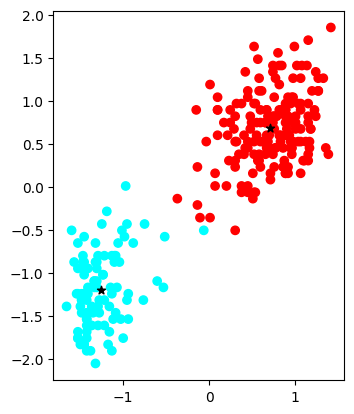

In [22]:
_, ax = plt.subplots()
c = np.array(['red', 'cyan'])[kmeans[2].labels_]
ax.scatter(eruption_time_std, wait_time_std, c=c)

for center in kmeans[2].cluster_centers_:
    ax.scatter(*center, c='black', marker='*')

ax.set_aspect(1.0)
plt.savefig('exercise2.jpg')
plt.show()

## Exercise 3

Load, preview, and standardize data. Plot column 0 ($x$) versus column 1 ($y$).

Loaded array shape: (75, 2)

First five rows of data
[[ 4. 53.]
 [ 5. 63.]
 [10. 59.]
 [ 9. 77.]
 [13. 49.]]



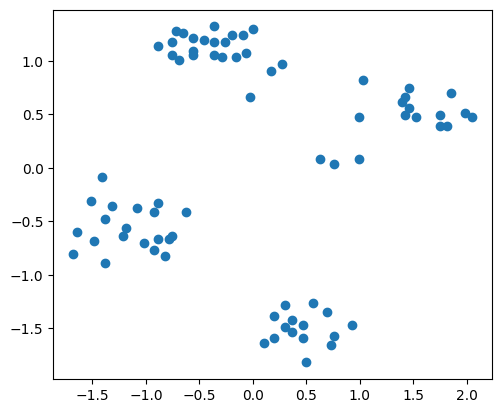

In [24]:
ex3_data = load_preview('ruspini_data.txt')
ex3_data_std = standardize(ex3_data)

_, ax = plt.subplots()
ax.scatter(ex3_data_std[:, 0], ex3_data_std[:, 1])
ax.set_aspect(1.0)
plt.show()

Run KMeans with $1 \le k \le 10$. Store and plot the energies.

k = 1, Energy = 150.0
k = 2, Energy = 75.45304292711121
k = 3, Energy = 45.633562920522536
k = 4, Energy = 10.224126812968091
k = 5, Energy = 7.9651988940254235
k = 6, Energy = 6.312361201725671
k = 7, Energy = 4.7856380992803365
k = 8, Energy = 4.229066995763582
k = 9, Energy = 3.6162664316372406
k = 10, Energy = 3.188491498249629


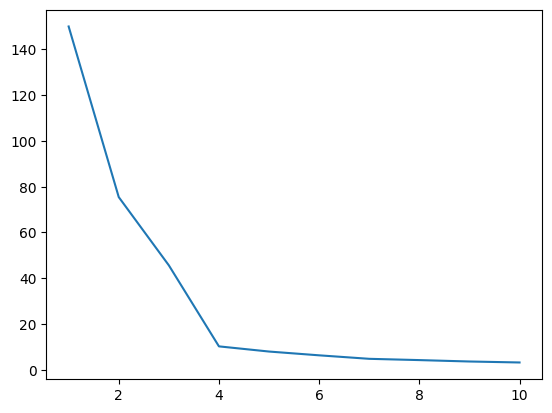

In [29]:
from sklearn.cluster import KMeans

E = []
for k in range(1, 11):
    E.append(KMeans(k, n_init='auto').fit(ex3_data_std).inertia_)
    print(f'k = {k}, Energy = {E[k-1]}')

_, ax = plt.subplots()
ax.plot(range(1, 11), E)
plt.show()

It looks like we should use $k=4$ clusters. Run KMeans with $k=4$, show plot of clusters, and save plot to `exercise3.jpg`.

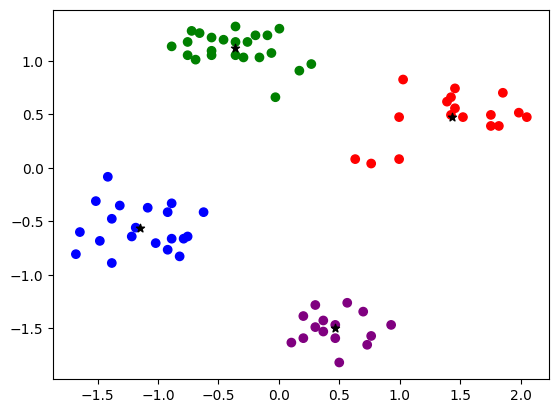

In [34]:
good_kmeans = KMeans(4, n_init='auto').fit(ex3_data_std)

_, ax = plt.subplots()
c = np.array(['red', 'blue', 'green', 'purple'])[good_kmeans.labels_]
ax.scatter(ex3_data_std[:, 0], ex3_data_std[:, 1], c=c)

ax.scatter(
    good_kmeans.cluster_centers_[:, 0],
    good_kmeans.cluster_centers_[:, 1],
    c='black', marker='*'
)
plt.savefig('exercise3.jpg')
plt.show()

## Exercise 4

Read the image and display it.

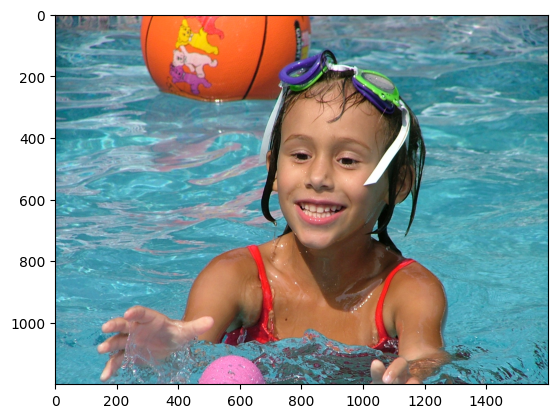

In [35]:
import imageio

image = imageio.v3.imread('swim.jpg')
plt.imshow(image)
plt.show()

Get array of colors. Make sure to convert to `float`.

In [37]:
colors = np.array(image, dtype=float).reshape(-1, image.shape[-1])
print(f'Color array shape: {colors.shape}')

Color array shape: (1920000, 3)


Run KMeans on the color array. Let's use $k=5$ clusters.

In [38]:
kmeans = KMeans(5, n_init='auto').fit(colors)

Reconstruct the image, replacing each pixel color by its cluster center. Display reconstructed image and save in `exercise4.jpg`.

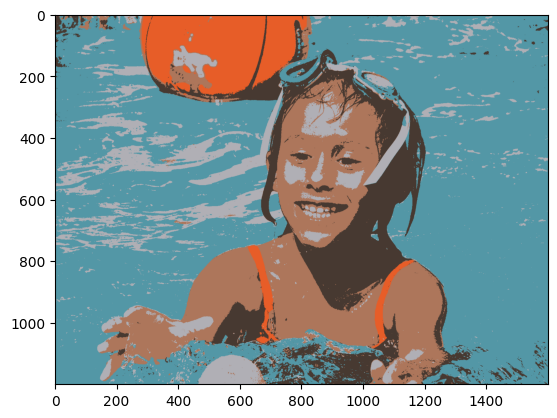

In [39]:
k_color_image = kmeans.cluster_centers_.astype(np.uint8)[kmeans.labels_].reshape(image.shape)

plt.imshow(k_color_image)
plt.show()

imageio.v3.imwrite('exercise4.jpg', k_color_image)

We can also try $k=10$ colors for fun.

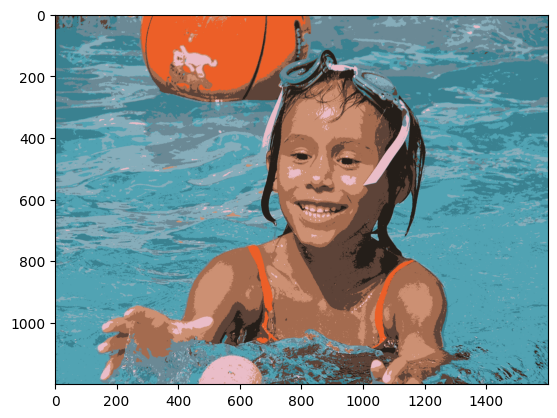

In [40]:
kmeans = KMeans(10, n_init='auto').fit(colors)

k_color_image = kmeans.cluster_centers_.astype(np.uint8)[kmeans.labels_].reshape(image.shape)

plt.imshow(k_color_image)
plt.show()

Or $k = 20$.

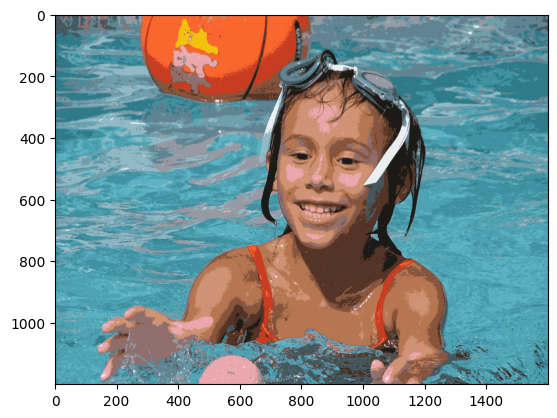

In [41]:
kmeans = KMeans(20, n_init='auto').fit(colors)

k_color_image = kmeans.cluster_centers_.astype(np.uint8)[kmeans.labels_].reshape(image.shape)

plt.imshow(k_color_image)
plt.show()